In [53]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [44]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/flight_data1.csv')
df = df[['DEPARTING_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND', 'DEP_DEL15']]
df = df.dropna()
df = df[(df['PRCP'] > 0) | (df['SNOW'] > 0) | (df['SNWD'] > 0)]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
print(df.describe())

                PRCP           SNOW           SNWD           TMAX  \
count  137405.000000  137405.000000  137405.000000  137405.000000   
mean        0.338507       0.731641       2.567867      35.933066   
std         0.572332       1.393558       3.115642      14.242365   
min         0.000000       0.000000       0.000000     -10.000000   
25%         0.000000       0.000000       0.000000      28.000000   
50%         0.060000       0.000000       1.200000      34.000000   
75%         0.350000       1.000000       3.900000      42.000000   
max         5.080000      17.200000      25.200000      81.000000   

                AWND      DEP_DEL15  
count  137405.000000  137405.000000  
mean        9.849338       0.281198  
std         4.173042       0.449585  
min         0.890000       0.000000  
25%         6.930000       0.000000  
50%         9.620000       0.000000  
75%        12.530000       1.000000  
max        27.070000       1.000000  


Accuracy: 0.7650984436305015
Precision: 0.5419426048565121
Recall: 0.024682048961946413
F1 Score: 0.04721380835617098


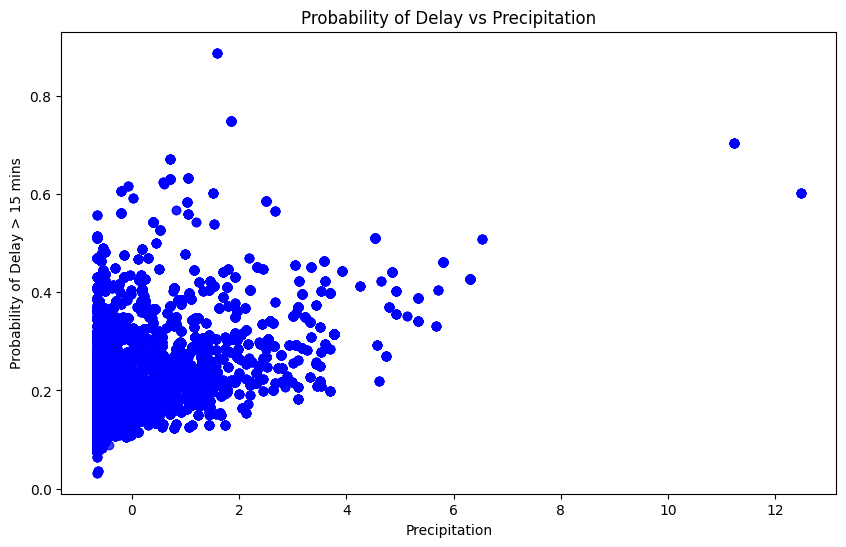

In [54]:
df = pd.read_csv('/content/drive/My Drive/flight_data1.csv')
df = df[['DEPARTING_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND', 'DEP_DEL15']]
df = df.dropna()
df = df[(df['PRCP'] > 0) | (df['SNOW'] > 0) | (df['SNWD'] > 0)]
df = pd.get_dummies(df, columns=['DEPARTING_AIRPORT'], drop_first=True)
X = df.drop('DEP_DEL15', axis=1)
y = df['DEP_DEL15']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
probabilities = log_reg.predict_proba(X_test)[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], probabilities, color='blue', alpha=0.5)  # Assuming PRCP is the first feature
plt.xlabel('Precipitation')
plt.ylabel('Probability of Delay > 15 mins')
plt.title('Probability of Delay vs Precipitation')
plt.show()